In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

data_file = os.path.join("clean_df.csv")
raw_data = pd.read_csv(data_file)
raw_data.drop(columns="Unnamed: 0", inplace=True)

In [2]:
# Filter CTA stations by stations near the United Center
ashland_stop = raw_data.loc[raw_data["station_id"]== 40170]
il_med_dist_stop = raw_data.loc[raw_data["station_id"]== 40810]
uc_stations_data = ashland_stop.append(il_med_dist_stop)
uc_stations_data

,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
199,40170,Ashland-Lake,2017-12-01,W,2568,False,False,True,False,False
290,40170,Ashland-Lake,2017-12-28,W,1457,False,False,False,False,False
472,40170,Ashland-Lake,2017-12-29,W,1547,False,False,True,False,False
706,40170,Ashland-Lake,2017-12-07,W,2382,False,False,False,False,False
946,40170,Ashland-Lake,2017-12-09,A,1164,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
194637,40810,Medical Center,2020-09-26,A,413,False,False,False,False,False
194638,40810,Medical Center,2020-09-27,U,279,False,False,False,False,False
194639,40810,Medical Center,2020-09-28,W,842,False,False,False,False,False
194640,40810,Medical Center,2020-09-29,W,862,False,False,False,False,False


In [3]:
# Average ridership on non-game days
no_game_filter = uc_stations_data[(uc_stations_data["Blackhawks"]==False)&
                                  (uc_stations_data["Bulls"]==False)]
no_game_group = no_game_filter.groupby(["daytype",])
no_games_avg = no_game_group[["daytype","rides"]].agg(["count","mean"])
no_games_avg.columns = no_games_avg.columns.get_level_values(1)
no_games_avg

,count,mean
daytype,,
A,288,984.000000
U,342,644.704678
W,1478,2139.066306


In [4]:
# Average ridership on blackhawks game days
hawks_games = uc_stations_data[(uc_stations_data["Blackhawks"]==True)]
hawks_daytype_group = hawks_games.groupby(["daytype"])
hawks_daytype_avg = hawks_daytype_group[["daytype","rides"]].agg(["count","mean"])
hawks_daytype_avg.columns = hawks_daytype_avg.columns.get_level_values(1)
hawks_daytype_avg

,count,mean
daytype,,
A,18,1081.555556
U,62,755.354839
W,152,2586.098684


In [5]:
# Average ridership on bulls game days
bulls_games = uc_stations_data[uc_stations_data["Bulls"]==True]
bulls_daytype_group = bulls_games.groupby(["daytype"])
bulls_daytype_avg = bulls_daytype_group[["daytype","rides"]].agg(["count","mean"])
bulls_daytype_avg.columns = bulls_daytype_avg.columns.get_level_values(1)
bulls_daytype_avg

,count,mean
daytype,,
A,90,1131.544444
U,40,678.575000
W,328,2463.451220


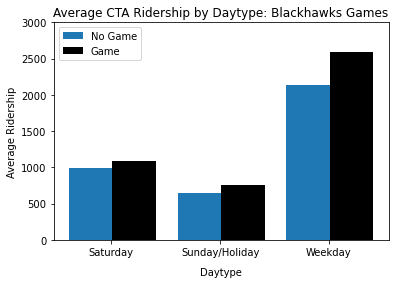

In [6]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
# Add team data to generate bar chart
team1_df = no_games_avg["mean"]
team2_df = hawks_daytype_avg["mean"]
team1_label = "No Game"
team2_label = "Game"

# Generate bar chart
w = 0.4
x = no_games_avg.index
labels = ["Saturday", "Sunday/Holiday", "Weekday"]
bar1 = np.arange(len(x))
bar2 = [b+w for b in bar1]

plt.bar(bar1,team1_df, w, label=team1_label)
plt.bar(bar2,team2_df, w, label=team2_label, color = "black")
plt.xticks(bar1+w/2.1, labels)

# labels
plt.title("Average CTA Ridership by Daytype: Blackhawks Games")
plt.ylabel("Average Ridership")
plt.xlabel("Daytype", labelpad=10)
plt.ylim(0,3000)
plt.legend()
plt.show()

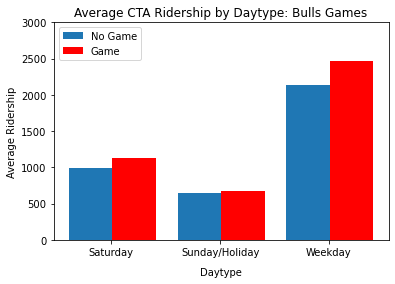

In [7]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
# Add team data to generate bar chart
team1_df = no_games_avg["mean"]
team2_df = bulls_daytype_avg["mean"]
team1_label = "No Game"
team2_label = "Game"

# Generate bar chart
w = 0.4
x = no_games_avg.index
x_labels = ["Saturday", "Sunday/Holiday", "Weekday"]
bar1 = np.arange(len(x))
bar2 = [b+w for b in bar1]

plt.bar(bar1,team1_df,w,label=team1_label)
plt.bar(bar2,team2_df,w,label=team2_label, color="red")
plt.xticks(bar1+w/2.1, x_labels)

# labels
plt.title("Average CTA Ridership by Daytype: Bulls Games")
plt.ylabel("Average Ridership")
plt.xlabel("Daytype", labelpad=10)
plt.ylim(0,3000)
plt.legend(loc = 2)
plt.show()

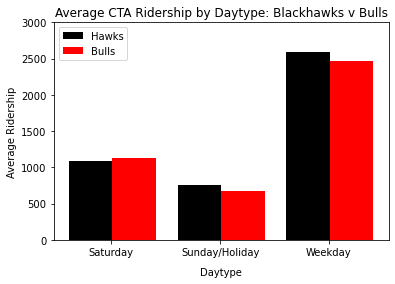

In [8]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
# Add team data to generate bar chart
team1_df = hawks_daytype_avg["mean"]
team2_df = bulls_daytype_avg["mean"]
team1_name = "Hawks"
team2_name = "Bulls"

# Generate bar chart
x_labels = ["Saturday", "Sunday/Holiday", "Weekday"]
w = 0.4
x = no_games_avg.index
bar1 = np.arange(len(x))
bar2 = [b+w for b in bar1]

plt.bar(bar1,team1_df, w, label=team1_name, color = "black")
plt.bar(bar2,team2_df, w, label=team2_name, color="red")
plt.xticks(bar1+w/2.1, x_labels)

# labels
plt.title("Average CTA Ridership by Daytype: Blackhawks v Bulls")
plt.ylabel("Average Ridership")
plt.xlabel("Daytype", labelpad=10)
plt.ylim(0,3000)
plt.legend(loc = 2)
plt.show()

In [9]:
hawks_bulls = uc_stations_data[(uc_stations_data["Blackhawks"]==True)&
                                  (uc_stations_data["Bulls"]==True)]
hawks_group2 = hawks_games.groupby(["Blackhawks"])
hawks_avg = hawks_group2[["rides"]].agg(["count","mean"])
hawks_avg.columns = hawks_avg.columns.get_level_values(1)
hawks_avg

,count,mean
Blackhawks,,
True,232,1980.116379


In [10]:
bulls = uc_stations_data[(uc_stations_data["Blackhawks"]==False)&(uc_stations_data["Bulls"]==True)]
bulls_group = bulls.groupby(["Bulls"])
bulls_avg = bulls_group[["daytype","rides"]].agg(["count","mean"])
bulls_avg.columns = bulls_avg.columns.get_level_values(1)
bulls_avg

,count,mean
Bulls,,
True,398,2040.20603


In [11]:
hawks_bulls_data = pd.DataFrame({"Teams": hawks_avg["mean"],"Bulls":bulls_avg["mean"]})
hawks_bulls_data.reset_index(drop=True, inplace=True)
hawks_bulls_data

,Teams,Bulls
0,1980.116379,2040.20603


In [12]:
hawks_bulls_tansform = pd.DataFrame(hawks_bulls_data.T)
hawks_bulls_tansform

,0
Teams,1980.116379
Bulls,2040.206030


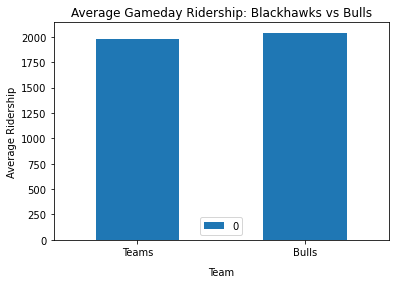

In [13]:
# Had help from code found in this video https://www.youtube.com/watch?v=ZjQCPMO7LBE
x = ["Blackhawks", "Bulls"]
ax = hawks_bulls_tansform.plot(kind="bar", label="index", rot=0,color=['C0', 'C5'])
# labels
plt.title("Average Gameday Ridership: Blackhawks vs Bulls")
plt.ylabel("Average Ridership")
plt.xlabel("Team", labelpad=10)
plt.xticks()
plt.show()

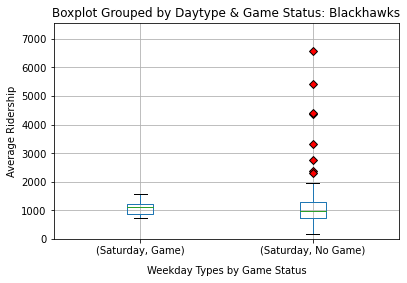

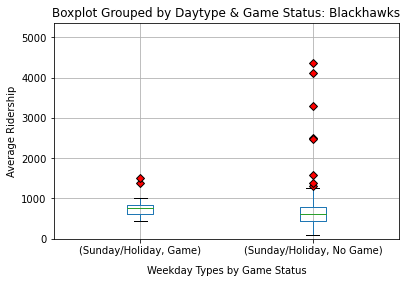

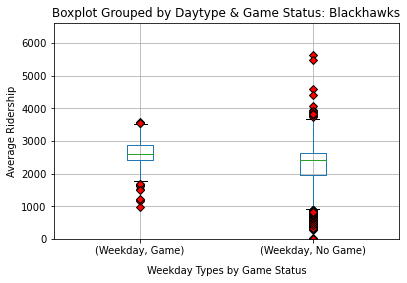

In [14]:
boxplot_team = "Blackhawks"
# Rename values for boxplots
boxplot_df = uc_stations_data.copy()
boxplot_df.loc[(boxplot_df["daytype"] == "A"), "daytype"] = "Saturday"
boxplot_df.loc[(boxplot_df["daytype"] == "U"), "daytype"] = "Sunday/Holiday"
boxplot_df.loc[(boxplot_df["daytype"] == "W"), "daytype"] = "Weekday"
boxplot_df.loc[(boxplot_df[boxplot_team] == True), boxplot_team] = "Game"
boxplot_df.loc[(boxplot_df[boxplot_team] == False), boxplot_team] = "No Game"

# Filter for each boxplot
saturday_df = boxplot_df[boxplot_df["daytype"]== "Saturday"]
sunday_df = boxplot_df[boxplot_df["daytype"]== "Sunday/Holiday"]
weekday_df = boxplot_df[boxplot_df["daytype"]== "Weekday"]


# Outlier format
red_square = dict(markerfacecolor='r', marker='D')

saturday_df.boxplot("rides", by=["daytype", boxplot_team],flierprops=red_square)
# Get rid of auto generated title
plt.suptitle('')
# Add labels & format
plt.title(f"Boxplot Grouped by Daytype & Game Status: {boxplot_team}")
plt.xlabel("Weekday Types by Game Status", labelpad=10)
plt.ylabel("Average Ridership")
plt.ylim(0,max(saturday_df["rides"])+1000)


sunday_df.boxplot("rides", by=["daytype", boxplot_team],flierprops=red_square)
# Get rid of auto generated title
plt.suptitle('')
# Add labels & format
plt.title(f"Boxplot Grouped by Daytype & Game Status: {boxplot_team}")
plt.xlabel("Weekday Types by Game Status", labelpad=10)
plt.ylabel("Average Ridership")
plt.ylim(0,max(sunday_df["rides"])+1000)


weekday_df.boxplot("rides", by=["daytype", boxplot_team],flierprops=red_square)
# Get rid of auto generated title
plt.suptitle('')
# Add labels & format
plt.title(f"Boxplot Grouped by Daytype & Game Status: {boxplot_team}")
plt.xlabel("Weekday Types by Game Status", labelpad=10)
plt.ylabel("Average Ridership")
plt.ylim(0,max(weekday_df["rides"])+1000)

plt.show()

In [15]:
anova_team = "Blackhawks"
sat_game = boxplot_df[(boxplot_df["daytype"] == "Saturday")&(boxplot_df[anova_team]=="Game")]["rides"]
sat_no_game = boxplot_df[(boxplot_df["daytype"] == "Saturday")&(boxplot_df[anova_team]=="No Game")]["rides"]
sun_game = boxplot_df[(boxplot_df["daytype"] == "Sunday/Holiday")&(boxplot_df[anova_team]=="Game")]["rides"]
sun_no_game = boxplot_df[(boxplot_df["daytype"] == "Sunday/Holiday")&(boxplot_df[anova_team]=="No Game")]["rides"]
weekday_game = boxplot_df[(boxplot_df["daytype"] == "Weekday")&(boxplot_df[anova_team]=="Game")]["rides"]
weekday_no_game = boxplot_df[(boxplot_df["daytype"] == "Weekday")&(boxplot_df[anova_team]=="No Game")]["rides"]

In [16]:
# Anova statistic to detect statistical difference
saturday = stats.f_oneway(sat_game,sat_no_game)
sunday = stats.f_oneway(sun_game, sun_no_game)
weekday = stats.f_oneway(weekday_game, weekday_no_game)
print(f'''
Team: {anova_team} 
Saturday: {saturday}
  Sunday: {sunday}
  Weeday: {weekday}
  ''')


Team: Blackhawks 
Saturday: F_onewayResult(statistic=0.18172080580349098, pvalue=0.6701349562162419)
  Sunday: F_onewayResult(statistic=4.2580552169537915, pvalue=0.03965867712688939)
  Weeday: F_onewayResult(statistic=33.971598142683355, pvalue=6.549434308072871e-09)
  
